In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("E://New_folder//DATASETS//WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [3]:
#delete rows including null values
data.dropna(inplace = True)

In [4]:
# Deleting column customerID
data.drop(["customerID"],axis=1,inplace = True)


In [5]:
data.gender = [1 if each == "Male" else 0 for each in data.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    data[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in data[item]]
    
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Convert remaining text based columns to dummy columns using pandas get_dummies function. This function creates new columns named as values of the related columns.

Now our data set only have integer and numerical columns so that we can apply statistical models.



In [6]:

data = pd.get_dummies(data=data)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Let's see the correlation between churn and the remaining columns. 
Customers having month-to-month contract, having fiber optic internet service and 
using electronic payment are tend to churn more whereas people having two-year contract and 
having internet service are tend to not churn.

In [7]:
data.corr()['Churn'].sort_values()

tenure                                    -0.354049
Contract_Two year                         -0.301552
InternetService_No                        -0.227578
TotalCharges                              -0.199484
Contract_One year                         -0.178225
Dependents                                -0.163128
Partner                                   -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
gender                                    -0.008545
PhoneService                               0.011691
OnlineSecurity                             0.023014
TechSupport                                0.026744
MultipleLines                              0.036148
OnlineBackup                               0.073934
DeviceProtection                           0.084402
SeniorCitizen                              0.150541
StreamingMov

### Prepare x and y

First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. 
Also, apply normalization to x in order to scale all values between 0 and 1.


In [8]:
#assign Class_att column as y attribute
y = data.Churn.values

#drop Class_att column, remain only numerical columns
new_data = data.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_data-np.min(new_data))/(np.max(new_data)-np.min(new_data)).values

### Splitting Data

Split the data set as train and test with %20-%80 ratio.



In [9]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state =1)

## Apply Machine Learning Algorithms
Let's start to apply some machine learning algorithms and find the accuracy of each

### KNN Classification

In [10]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))


KNN accuracy according to K=3 is : 0.7469793887704336


We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. 
So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. 
So that we can find the optimal K value.

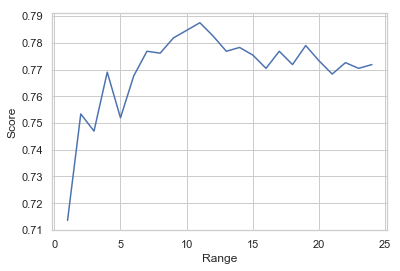

In [11]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
sns.set(style="whitegrid")
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 11, then we get maximum score of %78.7


In [12]:
knn_model = KNeighborsClassifier(n_neighbors = 11) #set K neighbor as 11
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=11 is :",accuracy_knn)

KNN accuracy according to K=11 is : 0.7874911158493249


### Logistic Regression Classification

In [13]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.798862828713575


C:\Users\Manoj Kumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### SVM(Support Vector Machine) Classification

In [14]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

C:\Users\Manoj Kumar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM accuracy is : 0.7953091684434968


### Naive Bayes Classification

In [15]:
# %%Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7213930348258707


### Decision Tree Classification

In [16]:
# %%Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7228144989339019


### Random Forest Classification

In [17]:
# %%Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.7668798862828714


I set tree number as 5 initially. But I want to find the appropriate tree number. 
Let's try to find the best number with trying 1 to 50.

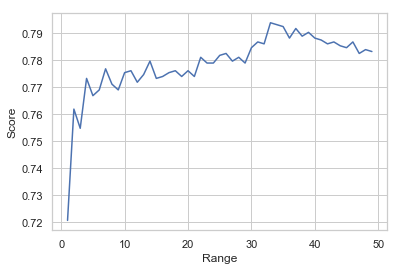

In [18]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see, the highest accuracy is at n_estimators = 33.

In [19]:
rf_model = RandomForestClassifier(n_estimators = 33, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 33 trees is :",accuracy_rf)

Random Forest accuracy for 33 trees is : 0.7938877043354655


Logistic regression and SVM classification algorithms have the highest accuracy. But as I mentioned before, our data is imbalanced. 
So it is important to look at the confusion matrix according to these two algorithms. With imbalanced datasets, the highest accuracy does not give the best model.
Assume we have 1000 total rows, 10 rows are churn and 990 rows are non-churn. If we find all these 10 churn rows as non-churn, then the accuracy will be still %99. 
Althogh it is a wrong model, if we do not look at the confusion matrix, then we can not see the mistake.

Confusion matrix gives us FN(false negative), FP(false positive), TN(true negative) and TP(true positive) values

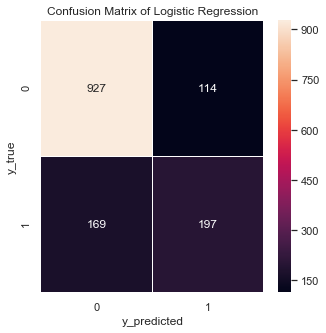

In [20]:
# %%Confusion Matrix libraries
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

#for Logistic Regression
cm_lr = confusion_matrix(y_test,lr_model.predict(x_test))

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

For logistic regression confusion matrix;

TN = 927
FP = 114
FN = 169
TP = 197

This means; there are total 927+114 = 1041 actual non-churn values and the algorithm predict 927 of them as non-churn and 114 of them churn. Also there are total 169 + 197 = 366 actual churn values and the algorithm predict 169 of them as non-churn and 197 of them as churn.

Acuuracy should not be used as solely metric for imbalance datasets. There are some other metrics named as recall and precision.

Sometimes we get high recall and low precision or vice versa. 
There is another metric that combines both precision and recall like below.
We will use F1 score to identify the best algorithm score

### Function that calculates and print both accuracy, recall, precision and weighted F1 score.

In [21]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)


 We can also use classification_report function from skleran library to show all these metrics

In [22]:
report = classification_report(y_test, lr_model.predict(x_test))
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.54      0.58       366

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



 Print all results of each algorithm.

In [23]:
print_scores("Logistic Regression;",y_test, lr_model.predict(x_test))
print_scores("SVC;",y_test, svc_model.predict(x_test))
print_scores("KNN;",y_test, knn_model.predict(x_test))
print_scores("Naive Bayes;",y_test, nb_model.predict(x_test))
print_scores("Decision Tree;",y_test, dt_model.predict(x_test))
print_scores("Random Forest;",y_test, rf_model.predict(x_test))

Logistic Regression;
accuracy:  0.798862828713575
precision:  0.6334405144694534
recall:  0.5382513661202186
f1_score:  0.7932808947173186
SVC;
accuracy:  0.7953091684434968
precision:  0.6335616438356164
recall:  0.505464480874317
f1_score:  0.7873119809594623
KNN;
accuracy:  0.7874911158493249
precision:  0.6006006006006006
recall:  0.546448087431694
f1_score:  0.7841326824444294
Naive Bayes;
accuracy:  0.7213930348258707
precision:  0.4796875
recall:  0.8387978142076503
f1_score:  0.738223282153598
Decision Tree;
accuracy:  0.7228144989339019
precision:  0.4689119170984456
recall:  0.49453551912568305
f1_score:  0.725156220759416
Random Forest;
accuracy:  0.7938877043354655
precision:  0.6233766233766234
recall:  0.5245901639344263
f1_score:  0.7878124816879418


### CONCLUSION

1. Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
2. Logistic Regression gives the highest F1 Score, so it is the best model.
3. Naive Bayes is the worst model because it gives the lowest F1 score.
4. Gender has no impact on churn.
5. People having month-to-month contract tend to churn more than people having long term conracts.
6. As the tenure increases, the probability of churn decreases.
7. As tmonthly charges increases, the probability of churn increases.